<a href="https://colab.research.google.com/github/KhuyenLE-maths/Project_Home_Credit_Default_Risk/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author: Thi Khuyen LE*

*Côte d'Azur University*

# Content
### I. Data preparation
### II. Data extracting and cleaning
     - Verify the existance of dupplicated rows
     - Missing values
     - Outliers 
### III. Exploratory data analysis
### IV. Multivariate analysis 

### V. Data preprocessing 
   - Encoding the categorical columns
   - Feature engineering

### VI. PCA
   
### VII. Deploy machine learning models for classifying data
   1. Support Vector Machine (SVM)
   2. K-nearest neighbors Classifier (KNN)
   3. Linear Discriminant Analysis (LDA)
   4. Quadratic Discriminant Analysis (QDA)
   5. Decision Tree Classifier (DT)
   6. Gaussian Naive Bayes Classifier (NB)
   7. Random Forest Classifier (RF)
   8. Gaussian Process Classifier (GPC)
   9. Gradient Boosting Classifier (GBC)
   10. Schochastic Gradient Descent Classifier (SGD)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import os 
os.chdir('/content/drive/MyDrive/AI_OpenClassroom/Project4/')

In [6]:
#pip install --upgrade tensorflow-gpu

________________________________________________________________________________

# I. Data preparation

In [7]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

**List of datasets**

In [8]:
data_path = 'Data/'
os.listdir(data_path)

['HomeCredit_columns_description.csv',
 'credit_card_balance.csv',
 'bureau_balance.csv',
 'POS_CASH_balance.csv',
 'application_test.csv',
 'bureau.csv',
 'installments_payments.csv',
 'sample_submission.csv',
 'previous_application.csv',
 'application_train.csv']

**Training set**

In [9]:
df_train = pd.read_csv(data_path + 'application_train.csv')

In [10]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print('Shape of training set:', df_train.shape)

Shape of training set: (307511, 122)


**Testing set**

In [12]:
df_test = pd.read_csv(data_path + 'application_test.csv')

In [13]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print('Shape of testing set:', df_test.shape)

Shape of testing set: (48744, 121)


# II. Data cleaning

## 1. Verify the existance of dupplicated rows in "df_train" and "df_test"

In [15]:
df_train[df_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [16]:
df_test[df_test.duplicated()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


There is no dupplicated row in both training and test sets.

## 2. Missing values

**Function to verify the existance of missing values in a given data frame**

In [17]:
def mis_val_check(df, thresh):
    '''
    INPUT: 
      - df: dataframe
      - thresh: a threshold of rejecting columns that theis missing percentage larger than this threshold.
    OUTPUT:
      - df_drop: is a new dataframe obtained by dropping "reject_cols" in the original dataframe "df"
      - mis_tab: is a table which presents the columns containing missing values, 
                   the number of missing values in each column as well as their misisng percentage.
      - reject_cols : a list of columns whose missing percentages are larger than the threshold 'thresh'. 
      
    '''
    # Step 1: Check the existance of missing values in dataframe "df"
    mis_tab = df.isna().sum().to_frame()
    
    # Step 2: Reset the index of dataframe
    mis_tab = mis_tab.reset_index()
    
    # rename the index of mis_tab
    mis_tab.rename(columns = {'index': 'Column', 0: 'mis_val'}, inplace = True)
    
    # Step 3: Compute the percentage of missing values corresponding to each column
    mis_tab['mis_val_percen'] = mis_tab['mis_val']/df.shape[0]
    
    # Step 4: Sort the dataframe by descending order of missing percentage
    mis_tab = mis_tab.sort_values(by = 'mis_val_percen', ascending = False)
    
    # Step 5: Find the columns whose missing percentages are larger than "thresh"
    reject_cols = list(mis_tab[mis_tab['mis_val_percen'] >= thresh].Column)
    
    # Step 6: Drop all the "reject_cols" in the original dataframe
    df_drop = df.drop(reject_cols, axis = 1)  
    
    return df_drop, mis_tab, reject_cols

### 2.1. Verify the missing values in both training and test sets

**Missing values on training set**

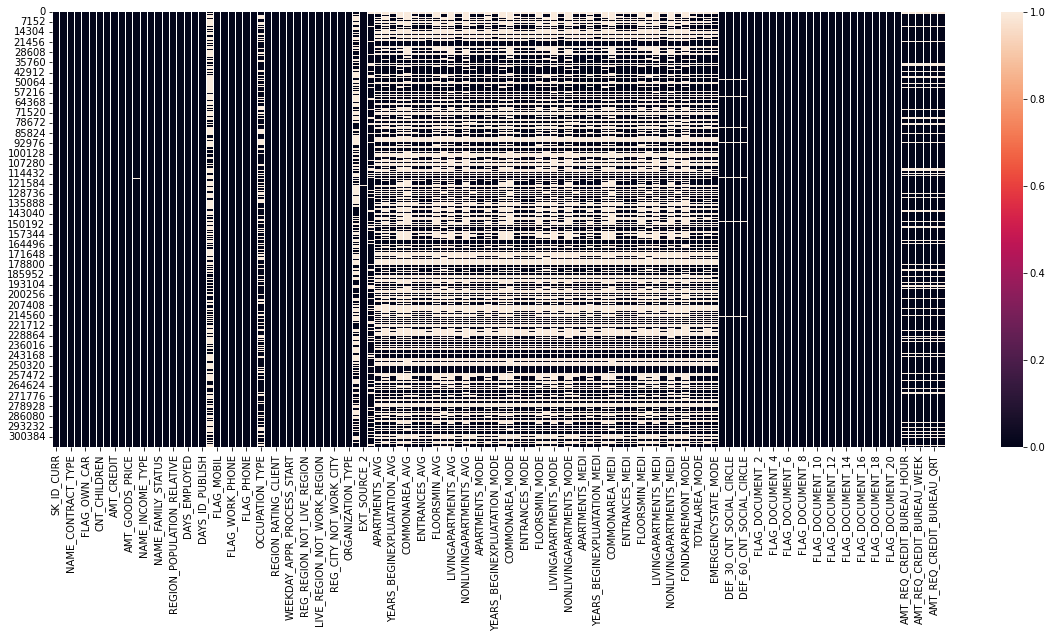

In [18]:
plt.figure(figsize = (20,8))
sns.heatmap(df_train.isna())

**Missing values on test set**

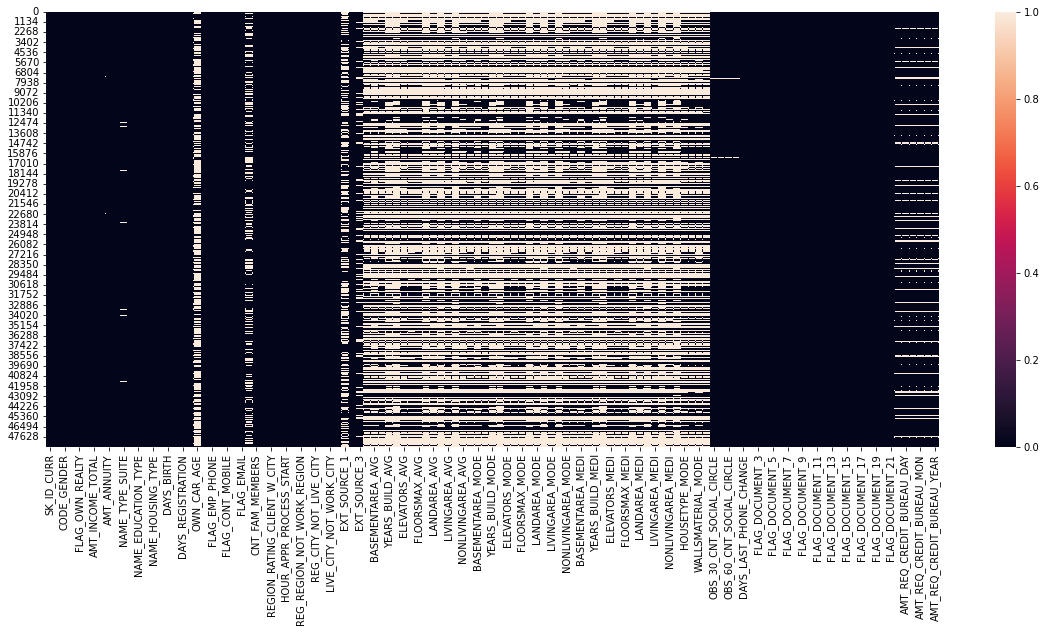

In [19]:
plt.figure(figsize = (20,8))
sns.heatmap(df_test.isna())

### 2.2. Clean missing values 
- Step 1: Drop all columns whose missing percentages are larger than 35%
- Step 2: Replace the remaining missing values in the categorical columns (or in integer columns) by their most frequent values and in the float columns by their mean values

#### Step 1: Drop all columns whose missing percentages are larger than 50%

In [20]:
thresh = 0.5
df_train_drop, mis_train, reject_cols_train = mis_val_check(df_train, thresh)

In [21]:
# List of the remaining columns:
keep_cols = list(set(df_train.columns) - set(reject_cols_train))
keep_cols = list(set(keep_cols) - set(['TARGET']))
print('Number of keeping columns: ', len(keep_cols))

Number of keeping columns:  80


In [22]:
df_test_drop = df_test[keep_cols]

#### Step 2: Replace the remaining missing values in the categorical columns (or in integer columns) by their most frequent values and in the float columns by their mean values

In [23]:
for ind, val in df_train_drop.dtypes.items():
    if ind == 'TARGET': 
        df_train_drop[ind] = df_train_drop[ind].fillna(df_train_drop[ind].mode().iloc[0])
    else:
        if val == 'object':
            df_train_drop[ind] = df_train_drop[ind].fillna(df_train_drop[ind].mode().iloc[0])
            df_test_drop[ind] = df_test_drop[ind].fillna(df_test_drop[ind].mode().iloc[0])
        else:
            df_train_drop[ind] = df_train_drop[ind].fillna(df_train_drop[ind].mean())
            df_test_drop[ind] = df_test_drop[ind].fillna(df_test_drop[ind].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Check the result**

In [24]:
print('Now, the number of missing values in "df_train_drop" is:')
df_train_drop.isna().sum().sum()

Now, the number of missing values in "df_train_drop" is:


0

In [25]:
print('Now, the number of missing values in "df_test_drop" is:')
df_test_drop.isna().sum().sum()

Now, the number of missing values in "df_test_drop" is:


0

# 3. Outliers
## 3.1. Verify the existance of outliers on training set

**Function to verify the outliers in a given dataframe**

In [26]:
def outlier_check(df):
    '''
    INPUT: 
        df: dataframe  
    OUTPUT:
        outliers_df: a table of columns which consist of outliers as well as their corresponding outlier numbers   
    '''
    # quantile of 25% (Q1) and 75* (Q3)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = (df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR)) 
    
    # convert the outlier table to frame
    outliers_df = outliers.sum().to_frame()
    
    # reset index of "outliers_df"
    outliers_df = outliers_df.reset_index()
    
    # change of column names of "outliers_df"
    outliers_df.rename(columns = {'index': 'column', 0: 'outliers'}, inplace = True)
    
    # Sort the "outliers_df" by descending of outlier number
    outliers_df = outliers_df.sort_values(by = 'outliers', ascending = False)
    
    return outliers_df

In [27]:
outliers_train = outlier_check(df_train_drop)

In [28]:
print('Top 20 columns of training set with the largest outlier numbers:')
out_train_top_20 = outliers_train.head(20)
out_train_top_20

Top 20 columns of training set with the largest outlier numbers:


,column,outliers
68,REGION_RATING_CLIENT,80527
69,REGION_RATING_CLIENT_W_CITY,78027
53,FLOORSMAX_MODE,72301
14,DAYS_EMPLOYED,72217
52,FLOORSMAX_MEDI,71777
51,FLOORSMAX_AVG,71099
71,REG_CITY_NOT_WORK_CITY,70867
50,FLAG_WORK_PHONE,61308
45,FLAG_EMP_PHONE,55386
55,LIVE_CITY_NOT_WORK_CITY,55215


## 3.2. Verify the existance of outliers on the test set

In [29]:
outliers_test = outlier_check(df_test_drop)

In [30]:
print('Top 20 columns of test set with the largest number of outliers:')
out_test_top_20 = outliers_test.head(20)
out_test_top_20

Top 20 columns of test set with the largest number of outliers:


,column,outliers
68,REGION_RATING_CLIENT,13388
69,REGION_RATING_CLIENT_W_CITY,12968
53,FLOORSMAX_MODE,12093
52,FLOORSMAX_MEDI,12023
14,DAYS_EMPLOYED,11630
71,REG_CITY_NOT_WORK_CITY,10951
37,FLAG_DOCUMENT_3,10401
50,FLAG_WORK_PHONE,9978
78,YEARS_BEGINEXPLUATATION_MEDI,9955
77,YEARS_BEGINEXPLUATATION_AVG,9925


# III. Exploratory data analysis
- All types of data
- Target column
- Categorical columns
- Numerical columns

## 1. Types in dataset

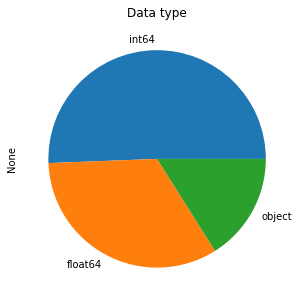

In [31]:
plt.figure(figsize = (5,5))
df_train_drop.dtypes.value_counts().plot.pie()
plt.title('Data type')
plt.show()

## 2. Target column

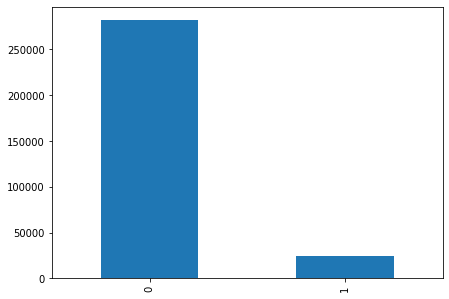

In [32]:
plt.figure(figsize = (7,5))
df_train_drop['TARGET'].value_counts().plot.bar()
plt.show()

In [33]:
df_train_drop['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

We see that almost observations are distributed in the "Class 0"

## 3. Categorical columns

In [34]:
cat_cols = df_train_drop.select_dtypes('object').columns
print('Number of categorical columns: ', len(cat_cols))
list(cat_cols)

Number of categorical columns:  13


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

**Visualize the proportion of observations in each column**


NAME_CONTRACT_TYPE


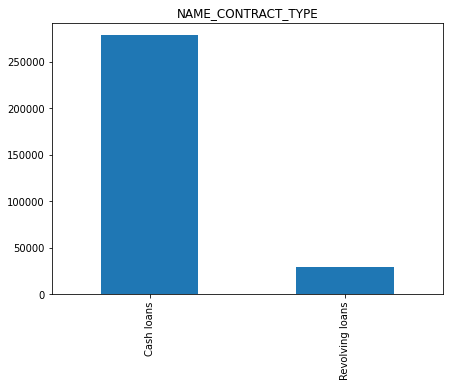


CODE_GENDER


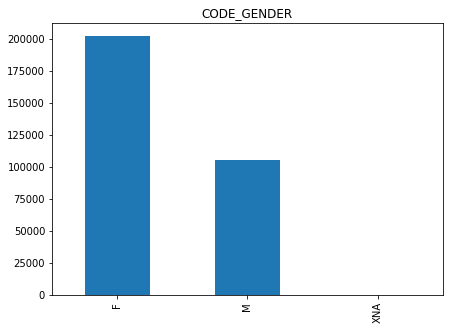


FLAG_OWN_CAR


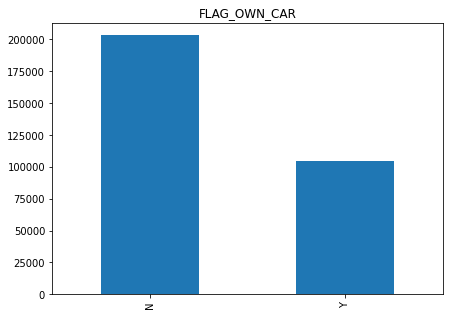


FLAG_OWN_REALTY


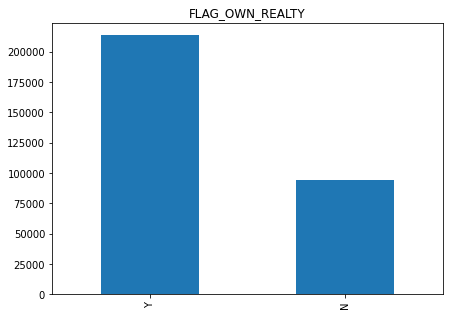


NAME_TYPE_SUITE


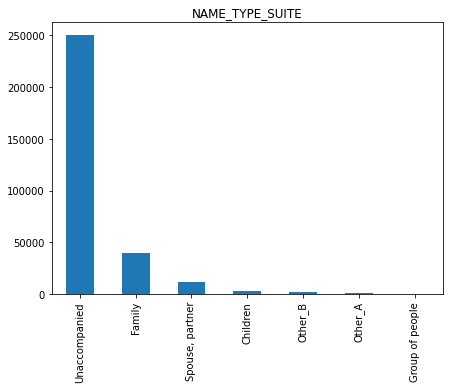


NAME_INCOME_TYPE


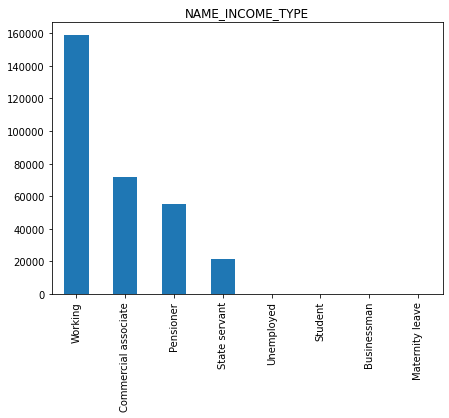


NAME_EDUCATION_TYPE


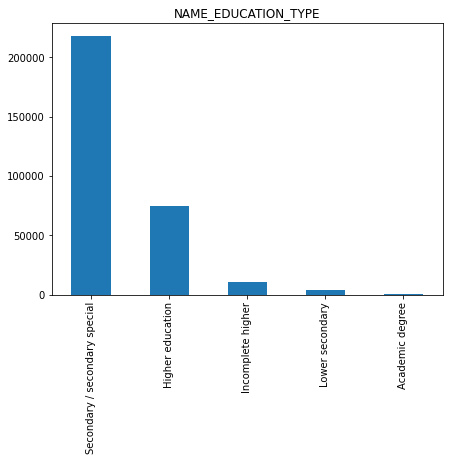


NAME_FAMILY_STATUS


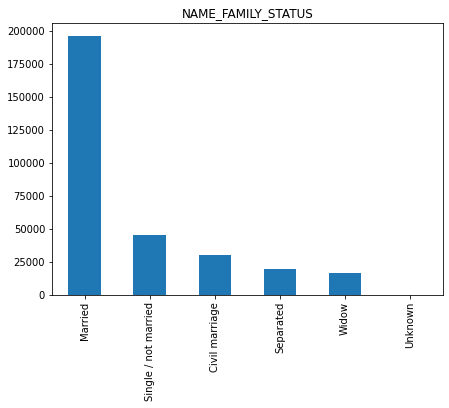


NAME_HOUSING_TYPE


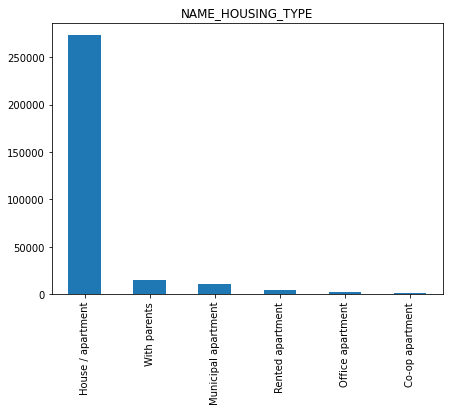


OCCUPATION_TYPE


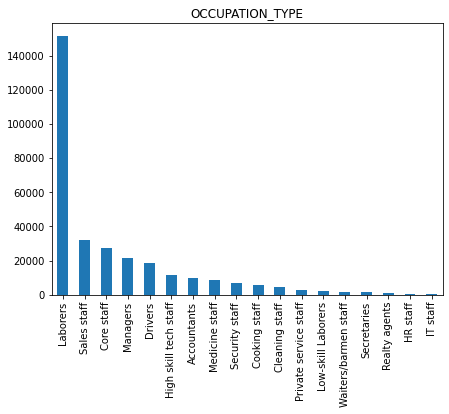


WEEKDAY_APPR_PROCESS_START


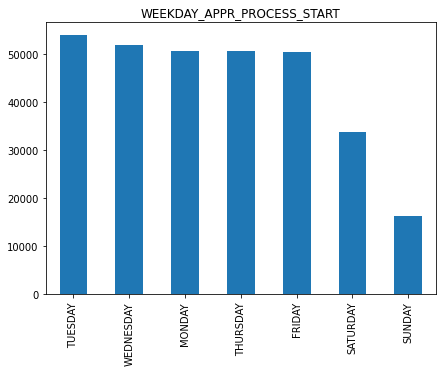


ORGANIZATION_TYPE


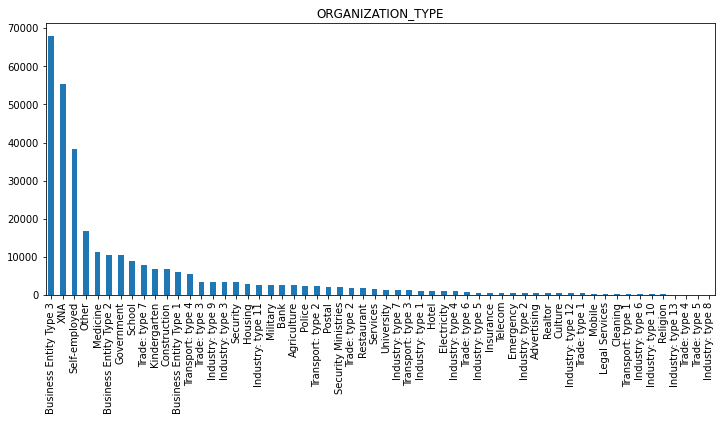


EMERGENCYSTATE_MODE


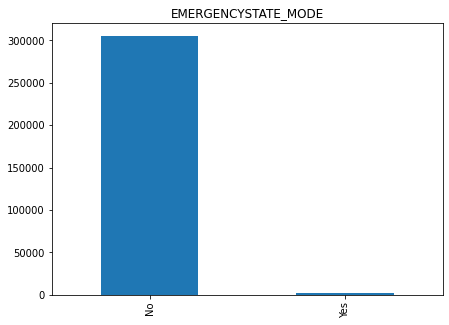

In [35]:
for col in cat_cols:
    print('')
    print(col)
    if col == "ORGANIZATION_TYPE":
        plt.figure(figsize = (12,5))
    else:
        plt.figure(figsize = (7,5))
    df_train_drop[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

## 3. Numerical columns

**Integer columns**

In [36]:
int_cols = df_train_drop.select_dtypes('int64').columns
print('Number of integer columns: ', len(int_cols))

Number of integer columns:  41


**Float columns**

In [37]:
float_cols = df_train_drop.select_dtypes('float64').columns
print('Number of float columns: ', len(float_cols))

Number of float columns:  27


In [38]:
'''
# Visualize the histograms of these columns:
plt.figure(figsize = (20,100))
i = 0
for col in [int_cols, float_cols]:
    i = i +1
    plt.subplot(21,4,i)
    df_train_drop[col].value_counts().plot.bar()
    plt.title(col)
'''

'\n# Visualize the histograms of these columns:\nplt.figure(figsize = (20,100))\ni = 0\nfor col in [int_cols, float_cols]:\n    i = i +1\n    plt.subplot(21,4,i)\n    df_train_drop[col].value_counts().plot.bar()\n    plt.title(col)\n'

# IV. Multivariate analysis

**Correlation matrix**

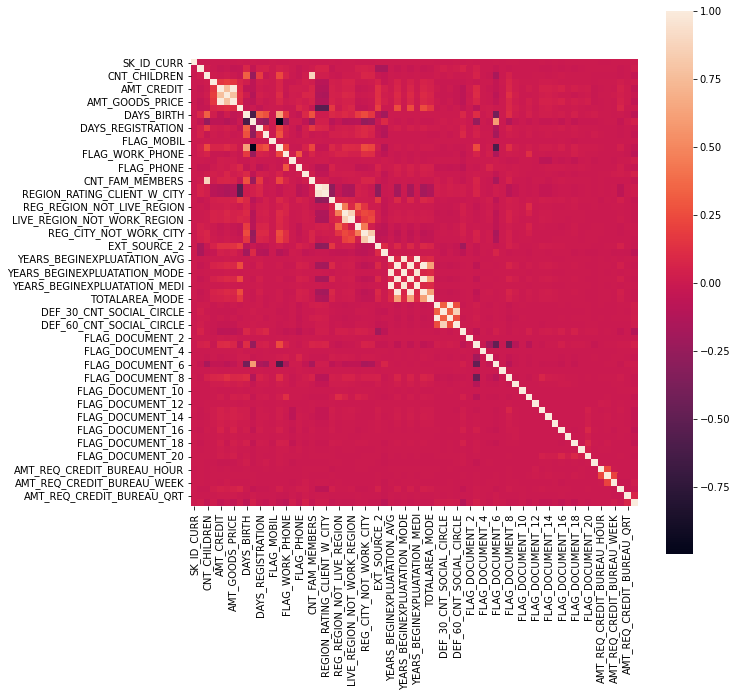

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train_drop.corr(), square = True, annot = False)
plt.show()

# V. Data preprocessing
1. Encoding the categorical columns
2. Determine the feature importances
3. Feature engineering

### Encoding the categorical columns

In [40]:
from sklearn.preprocessing import LabelEncoder

**Check if the category numbers in the training set and test set are the same**

In [41]:
for col in cat_cols:
    set_train = set(df_train_drop[col])
    set_test = set(df_test_drop[col])
    test = set_test.issubset(set_train)
    if test == False:
        print(colored(col, 'red'))
        print('')
        print('Train set', set_train)
        print('')
        print('Test set', set_test)
        print('')

We see that the element set in each categorical column of the dataframe "df_test_drop" is a subset of the one in "df_train_drop". Hence, we can encoding these two dataframes easily.

In [42]:
for col in cat_cols:
    le = LabelEncoder()
    df_train_drop[col] = le.fit_transform(df_train_drop[col])
    df_test_drop[col] = le.transform(df_test_drop[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**The actual data types of the training and testing sets:**

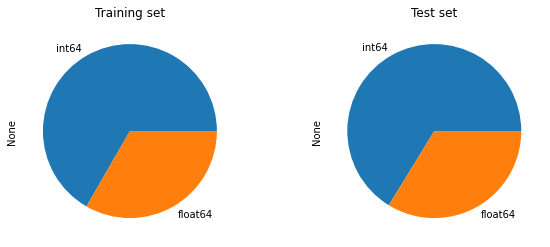

In [43]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
df_train_drop.dtypes.value_counts().plot.pie()
plt.title('Training set')

plt.subplot(1,2,2)
df_test_drop.dtypes.value_counts().plot.pie()
plt.title('Test set')

plt.show()

# VI. PCA

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca_plot_tools import display_explained_var_ratio
from ipywidgets import interact, fixed

**Data normalization**

In [45]:
X_train = df_train_drop.drop('TARGET', axis = 1).values
y_train = df_train_drop['TARGET']

X_test = df_test_drop.values

In [46]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**PCA with sklearn**

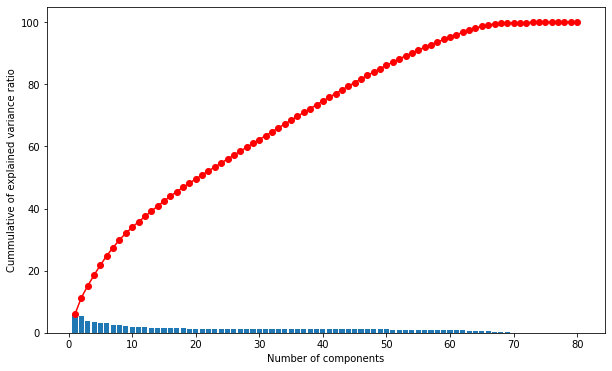

In [47]:
pca = PCA().fit(X_train_std)

# display explained variance ratio
var_ratio = pca.explained_variance_ratio_*100

plt.figure(figsize = (10,6))
display_explained_var_ratio(var_ratio)

In [48]:
var_ratio.cumsum()

array([  6.00073045,  11.30769111,  15.10338925,  18.56937962,
        21.79046813,  24.84052571,  27.45622313,  29.92113577,
        32.08131634,  33.95449882,  35.72662127,  37.45518233,
        39.1265914 ,  40.7822848 ,  42.37834055,  43.95825728,
        45.41338666,  46.82198415,  48.17865891,  49.51624065,
        50.83882204,  52.12188698,  53.40067336,  54.67089918,
        55.9392188 ,  57.20013874,  58.45856945,  59.7149298 ,
        60.96985568,  62.22346893,  63.47548755,  64.72539453,
        65.97422121,  67.21982177,  68.4639241 ,  69.70613105,
        70.94323407,  72.17756295,  73.40952034,  74.62598104,
        75.83399956,  77.03683498,  78.22374769,  79.39954674,
        80.56237741,  81.72214671,  82.85913633,  83.96769231,
        85.05628001,  86.12301964,  87.15437487,  88.16402606,
        89.14965939,  90.09629067,  91.03186039,  91.91644299,
        92.77168452,  93.60219114,  94.42757413,  95.22509744,
        95.99055108,  96.74170844,  97.44125203,  98.08

**More than 98% information concentrates on 66 first compoents**

In [49]:
'''
n_comp = 66
pca = PCA(n_components = n_comp)
pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
'''

'\nn_comp = 66\npca = PCA(n_components = n_comp)\npca.fit(X_train_std)\n\nX_train_pca = pca.transform(X_train_std)\nX_test_pca = pca.transform(X_test_std)\n'

**Present the data on 2 dimensions with Umap**
Umap is method to project data on 2 dimensions. 
Refs https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [51]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 12.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=c09d593959584c245fd51f141776e47fd3876bf81c367c39facc89e8fb4d4371
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=216a4fb2ebba2a902ac5124a3743757583a38ba0d144bef13da9d4873940c9c7
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [52]:
import umap.umap_ as UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


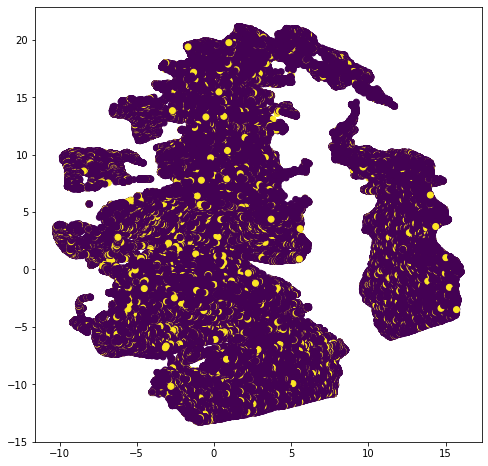

In [53]:
reducer = UMAP.UMAP()
embedding = reducer.fit_transform(X_train)
plt.figure(figsize = (8,8))
plt.scatter(embedding[:,0], embedding[:,1], c = y_train)
plt.show()

## VII. Classification

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, classification_report

**Train/Val splitting**

In [57]:
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

X_train = X_train_
y_train = y_train_
X_val = X_val_
y_val = y_val_

**Data balancing for the training set**

In [58]:
over_sampler = RandomOverSampler(random_state = 1)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

In [59]:
# Check the result
y_train.value_counts()

1    226153
0    226153
Name: TARGET, dtype: int64

**Data normalization**

In [60]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_val_scaled = scale.transform(X_val)

In [62]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 37 kB/s 


In [63]:
from catboost import CatBoostClassifier
param_grid_Cat = {}
model_Cat = CatBoostClassifier

In [66]:
grid_search_Cat = GridSearchCV(estimator = model_Cat(),
                               param_grid = param_grid_Cat,
                               cv = 5,
                               verbose = 1)

In [ ]:
grid_search_Cat.fit(X_train_scaled, y_train)
y_pred_Cat = grid_search_Cat.predict(X_val_scaled)

In [74]:
balanced_accuracy_score(y_val, y_pred_Cat)

0.6819827140366832

In [76]:
accuracy_score(y_val, y_pred_Cat)

0.7591499601645448

**Conclusion:**

In this project, a variety of visualization tools have been applied for discovering the statistic information of the dataset, including bar, pie, histogram, correlation matrix, Umap. Completed reprocessing techniques are also used for our dataset: from data cleaning, encoding, to data balancing for classification purposes. Finally, the classification is affected based on the CatBoost which is one of the most recent algorithms. As the projections of two classes in 2 dimensions are not discriminated, as shown in the above Umap figure, hence it is very chalenging to discriminate between these two groups. The CatBoost algorithm gives an accuracy of 75.91% and a balanced accuracy score of 68.2%. 

